<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="" data-toc-modified-id=""><span class="toc-item-num">&nbsp;&nbsp;</span><font color="orange"></font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Пред-обработка" data-toc-modified-id="Пред-обработка-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Пред обработка</a></span><ul class="toc-item"><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Чистка" data-toc-modified-id="Чистка-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Чистка</a></span></li><li><span><a href="#Векторизация" data-toc-modified-id="Векторизация-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Векторизация</a></span></li></ul></li><li><span><a href="#Пред-обработка-тестовой-выборки" data-toc-modified-id="Пред-обработка-тестовой-выборки-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Пред обработка тестовой выборки</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Кросс-валидация" data-toc-modified-id="Кросс-валидация-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Кросс-валидация</a></span><ul class="toc-item"><li><span><a href="#LinearSVC" data-toc-modified-id="LinearSVC-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>LinearSVC</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Подбор-порога" data-toc-modified-id="Подбор-порога-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подбор порога</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Классификация комментариев

Необходимо обучить модель для классификации комментариев на позитивные и негативные.

## Подготовка

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

from lightgbm import LGBMClassifier

from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()

import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')
nltk.download('stopwords')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/opt/conda/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Загрузка данных

In [2]:
df = pd.read_csv('/datasets/toxic_comments.csv')

### Анализ

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
text     159571 non-null object
toxic    159571 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [4]:
df

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


Пропусков нет, идем дальше

Text(0.5, 1.0, 'Распределение целевого признака')

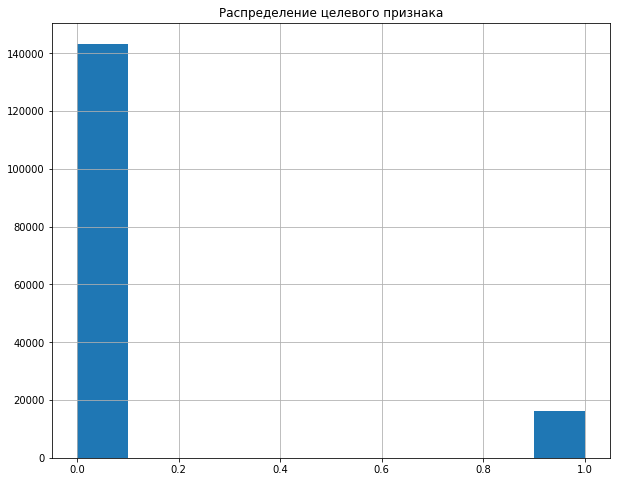

In [5]:
plt.figure(figsize=(10, 8))
df['toxic'].hist()
plt.title('Распределение целевого признака')

Есть сильный дисбаланс классов

Сразу отделим тестовую выборку

In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['toxic'])

In [7]:
def target_features_split(df, target_col):
    target = df[target_col]
    features = df.drop([target_col], axis=1)
    return target, features

In [8]:
target_train, features_train = target_features_split(train, 'toxic')
target_test, features_test = target_features_split(test, 'toxic')

Отделили целевой признак

'Сравнение ключевого признака в тренировочной и тестовой выборках'

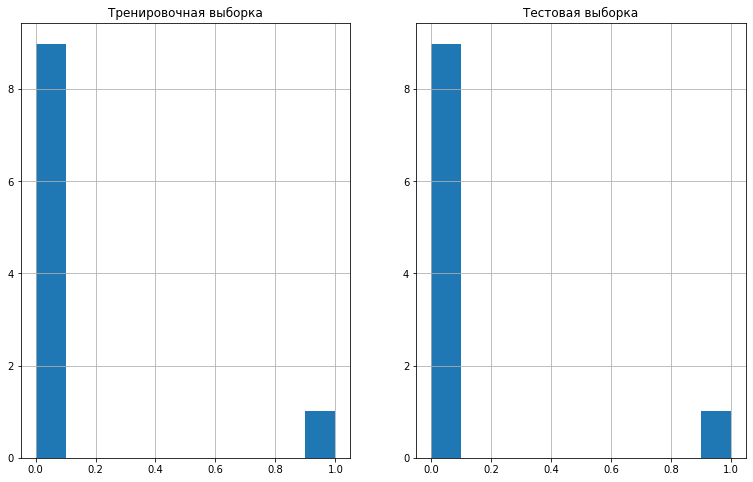

In [9]:
plt.figure(figsize=(13, 8))
plt.subplot(121)
plt.title('Тренировочная выборка')
target_train.hist(density=True)

plt.subplot(122)
plt.title('Тестовая выборка')
target_test.hist(density=True)
display('Сравнение ключевого признака в тренировочной и тестовой выборках')

### Пред обработка

#### Лемматизация

In [10]:
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    word_list = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(w) for w in word_list])

In [11]:
features_train['text'] = features_train['text'].progress_apply(lemmatization)

Лемматизировали с побощью nltk

#### Чистка 

In [12]:
def clear_text(text):
    return ' '.join(re.sub(r'[^a-z]', ' ',text.lower()) .split())

In [13]:
features_train['text'] = features_train['text'].progress_apply(clear_text)

Привили к нижнему регистру и убрали неожиданные символы

#### Векторизация 

In [14]:
stop_words = set(nltk_stopwords.words('english'))
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2))
features_train = tfidf_vectorizer.fit_transform(features_train['text'].astype('U'))

Векторизовали и удалили стоп слова

### Пред обработка тестовой выборки

In [15]:
def preprocessing(df):
    df = df.apply(lemmatization)# лемматизация
    df = df.apply(clear_text)# чистка
    df = tfidf_vectorizer.transform(df.astype('U'))# векторизация
    return df
features_test = preprocessing(features_test['text'])

## Обучение

In [16]:
results = pd.DataFrame(columns=['model', 'f1_score'])

### Кросс-валидация

Будем обучать линейные модели, для деревянных слишком большое признаковое пространство

#### LinearSVC

In [17]:
%time
model_LSVC = LinearSVC(random_state=42, class_weight='balanced')

parameters = [{'C': [0.5, 0.4, 0.3]}]


LSVC_model_gscv = GridSearchCV(model_LSVC, param_grid=parameters, scoring='f1', n_jobs=-1, 
                   cv=5, verbose=True)
LSVC_model_gscv.fit(features_train, target_train)
print(LSVC_model_gscv.best_params_)
results.loc[len(results)] = ['LinearSVC train', '{:.4f}'.format(LSVC_model_gscv.best_score_)]

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.2min finished


{'C': 0.4}


#### LogisticRegression

In [18]:
%time
model_LR = LogisticRegression(random_state=42, class_weight='balanced')
parameters = [{'C': [8.7, 8.8, 8.6]}]

LR_model_gscv = GridSearchCV(model_LR, param_grid=parameters, scoring='f1', n_jobs=-1, 
                   cv=5, verbose=True)
LR_model_gscv.fit(features_train, target_train)
print(LR_model_gscv.best_params_)
results.loc[len(results)] = ['LogisticRegression train', '{:.4f}'.format(LR_model_gscv.best_score_)]
results

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.4min finished


{'C': 8.7}


,model,f1_score
0,LinearSVC train,0.7800
1,LogisticRegression train,0.7798


Обе модели себя достаточно хорошо показали, и качество примерно одинаковое

## Тестирование

In [19]:
%time
predict = LSVC_model_gscv.best_estimator_.predict(features_test)
print('F1: {:.4f}'.format(f1_score(target_test, predict)))

results.loc[len(results)] = ['LinearSVC test', '{:.4f}'.format(f1_score(target_test, predict))]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
F1: 0.7802


In [20]:
%time
predict = LR_model_gscv.best_estimator_.predict(features_test)
print('F1: {:.4f}'.format(f1_score(target_test, predict)))

results.loc[len(results)] = ['LogisticRegression test', '{:.4f}'.format(f1_score(target_test, predict))]

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 12.6 µs
F1: 0.7787


На тестовой выборке модели показывают примерно одинаковый результат

### Подбор порога

Попробуем подобрать порог для линейной регрессии

In [21]:
predict_proba = LR_model_gscv.best_estimator_.predict_proba(features_test)[:,1]

In [22]:
f1 = []
for threshold in np.arange(0, 1.01, 0.01):
    predict = predict_proba > threshold
    f1.append([float('{:.2f}'.format(threshold)),float('{:.4f}'.format(f1_score(target_test, predict)))])


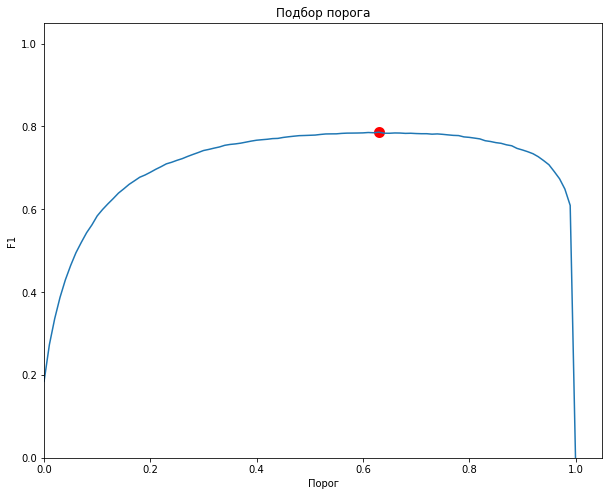

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(np.array(f1)[:,0],np.array(f1)[:,1])
plt.scatter(0.63, 0.7862, c='r', lw = 5)

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Порог')
plt.ylabel('F1')
plt.title('Подбор порога')

plt.show()

In [24]:
predict = predict_proba > 0.63
print('F1: {:.4f}'.format(f1_score(target_test, predict)))

results.loc[len(results)] = ['LogisticRegression threshold test', '{:.4f}'.format(f1_score(target_test, predict))]

F1: 0.7862


За счет подбора порога, логистическая регрессия стала показывать лучше результат

## Выводы

In [25]:
results

,model,f1_score
0,LinearSVC train,0.7800
1,LogisticRegression train,0.7798
2,LinearSVC test,0.7802
3,LogisticRegression test,0.7787
4,LogisticRegression threshold test,0.7862


* токенизировали
* лемматизировали
* оставили только буквы английского алфавита
* удалили стоп слова
* векторизовали
* обучили модели
* добились значения метрики F1 выше 0.75

    На тестовой выборке Логистическая регрессия после подбора порога показывает лучше результат чем метод опорных векторов. Но LinearSVC быстрее предсказывает и обучается, также более устойчива к выбросам.

Итоговые значения F1 метрики:
- LinearSVC:   0.7802
- LogisticRegression:   0.7862